<a href="https://colab.research.google.com/github/michalmitrik/SDA_final_project/blob/main/TITANIC_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITANIC - survival prediction

**A short description of project:**
The project deals with data on passengers on the Titanic. it includes demographic information as well as information about which of the participants survived and which did not.

**What it contains:**
Dataset contains information of 891 people including age, sex, class, name, ID, tickets and infomation if they survived the cruise or not.

**What is the goal/motivation:**
The goal is to check how accurate the selected data model is in prediction of survivals.

**What is the result:** Exact information about the accuracy, precision and recall of model in prediction of survival of passengers.

## 1. Import libraries

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Increase a figure size
sns.set(rc={'figure.figsize':(12,8)})

%matplotlib inline

## 2. Read data

In [107]:
titanic_data = pd.read_csv('titanic_data.csv')

## 3. EDA

In [108]:
len(titanic_data)

891

In [109]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [111]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

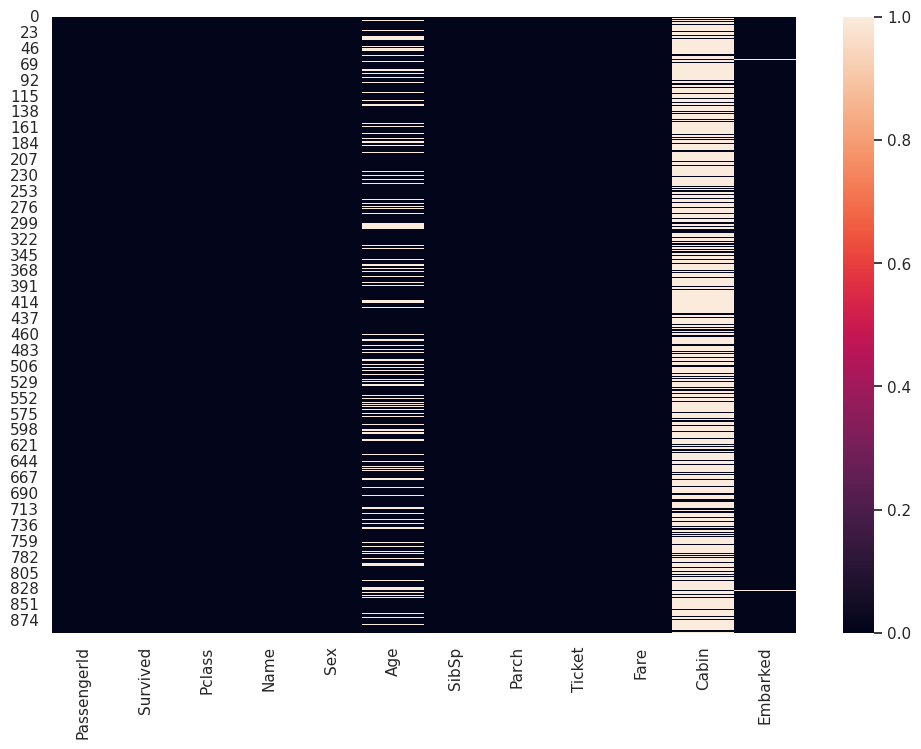

In [112]:
sns.heatmap(titanic_data.isna())

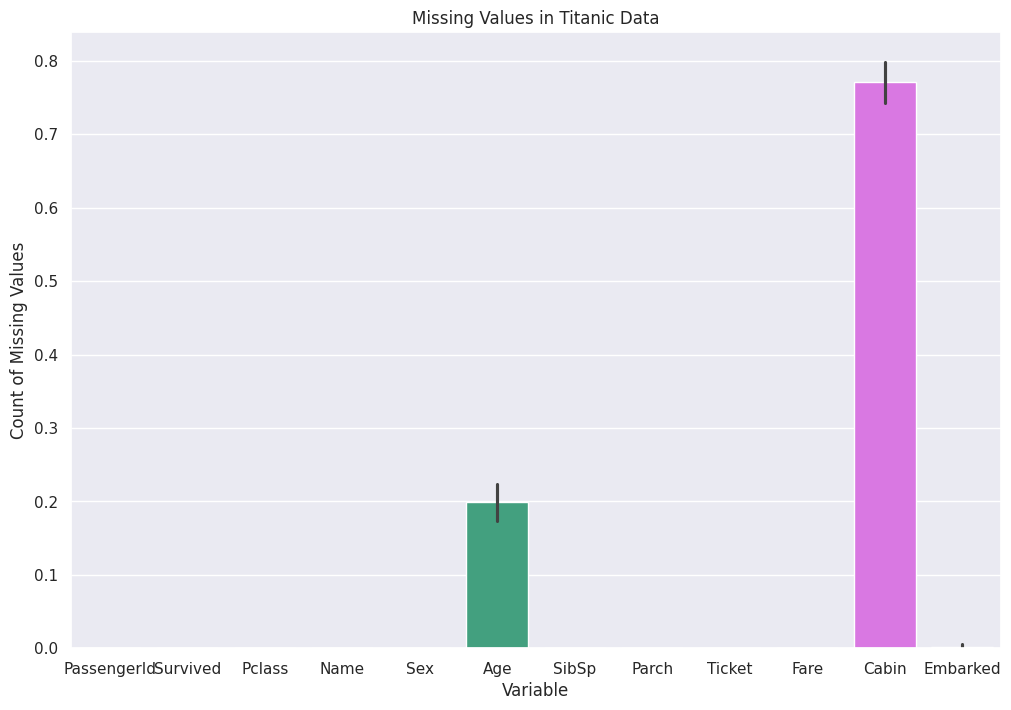

In [113]:
sns.barplot(titanic_data.isna())
plt.xlabel("Variable")
plt.ylabel("Count of Missing Values")
plt.title("Missing Values in Titanic Data")
plt.show()

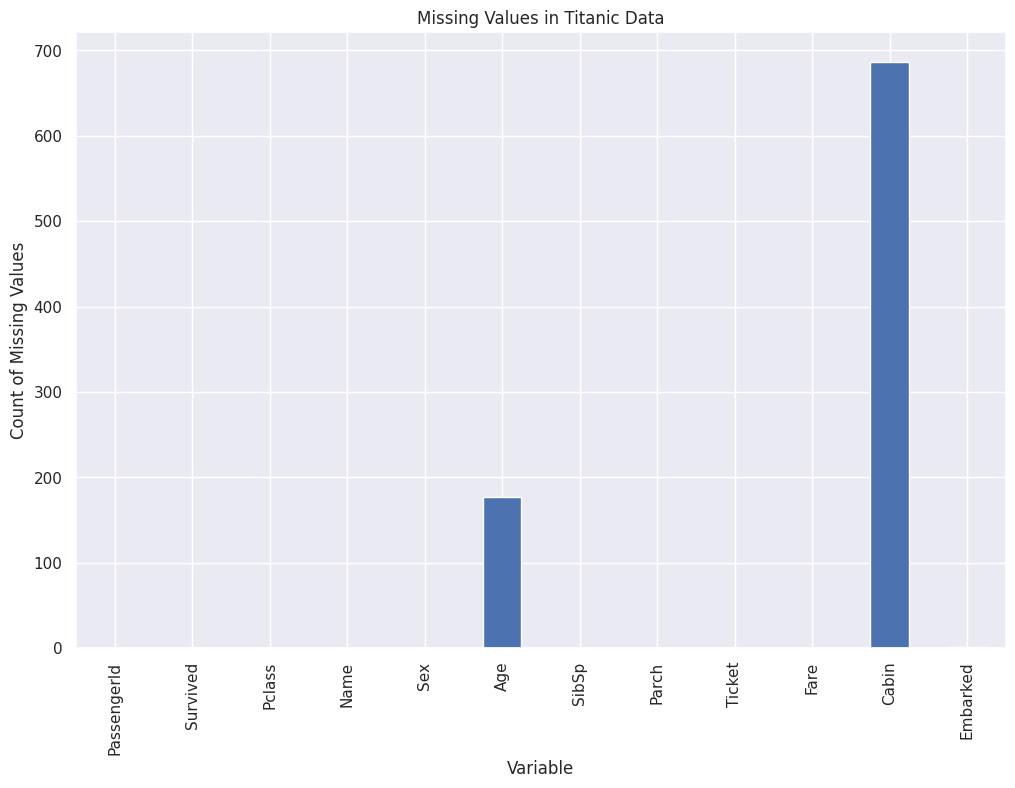

In [114]:
missing_values = titanic_data.isna().sum()
missing_values.plot(kind='bar')
plt.xlabel("Variable")
plt.ylabel("Count of Missing Values")
plt.title("Missing Values in Titanic Data")
plt.show()

## 4. Feature and data preparation

In [115]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [116]:
sex1=pd.get_dummies(titanic_data['Sex'],drop_first=True)
titanic_data['Sex']=sex1

In [117]:
embarked1=pd.get_dummies(titanic_data['Embarked'], prefix='Embarked')

In [118]:
titanic_data = pd.concat([titanic_data, embarked1], axis=1)


In [119]:
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  Embarked_C  Embarked_Q  \
0         A/5 21171   7.2500   NaN        S           0           0   
1          PC 17599  71.2833   C85        C           1           0   
2  STON/O2. 3101282   7.9250   NaN        S           0           0   
3           

In [120]:
titanic_data.drop('Embarked', axis=1, inplace=True)


In [121]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    uint8  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(4)
memory usage: 73.2+ KB


In [122]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


## 5. Create model

In [123]:
y=titanic_data['Survived']

In [124]:
X=titanic_data[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Embarked_C','Embarked_S','Embarked_Q']]

In [125]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [126]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_S,Embarked_Q
0,1,3,1,22.0,1,0,0,1,0
1,2,1,0,38.0,1,0,1,0,0
2,3,3,0,26.0,0,0,0,1,0
3,4,1,0,35.0,1,0,0,1,0
4,5,3,1,35.0,0,0,0,1,0


In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [129]:
print(X_train.shape)

(668, 9)


In [130]:
print(X_test.shape)

(223, 9)


# 6. Training and evaluation of model

## 6.1 Logistic regression


In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
model = LogisticRegression(random_state=30)
model.fit(X_train, y_train)

LogisticRegression(random_state=30)

In [133]:
lr=LogisticRegression()

In [134]:
lr.fit(X_train,y_train)

LogisticRegression()

In [135]:
predict=lr.predict(X_test)

In [136]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [137]:
y_pred_train

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [138]:
y_pred_test

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1])

In [139]:
y_test.values

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1])

In [140]:
from sklearn.metrics import confusion_matrix

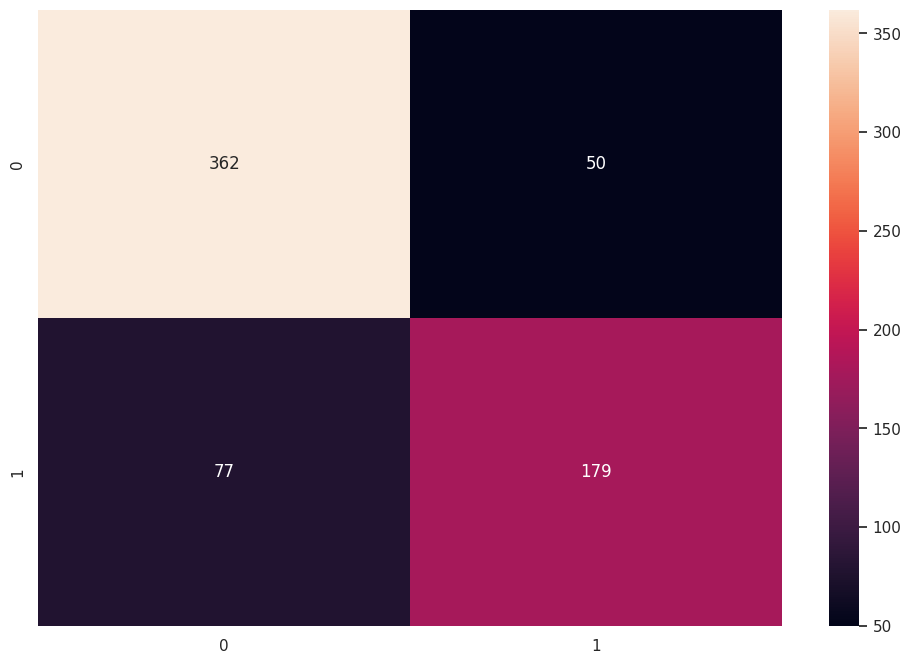

In [141]:
cm_train=confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.show()

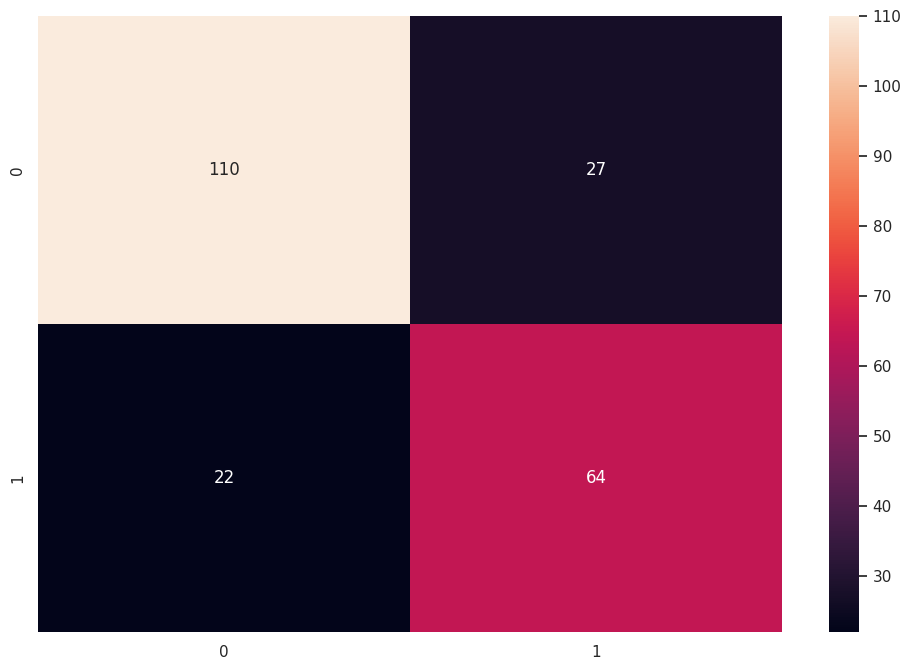

In [142]:
cm_train=confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.show()

In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [144]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train, y_pred_train)


In [145]:
print('Accuracy:', accuracy_train)
print('Precision:', precision_train)
print('Recall:', recall_train)
print('F1 score:', f1_score_train)

Accuracy: 0.8098802395209581
Precision: 0.7816593886462883
Recall: 0.69921875
F1 score: 0.7381443298969071


In [146]:
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test)

In [147]:
print('Accuracy:', accuracy_test)
print('Precision:', precision_test)
print('Recall:', recall_test)
print('F1 score:', f1_score_test)

Accuracy: 0.7802690582959642
Precision: 0.7032967032967034
Recall: 0.7441860465116279
F1 score: 0.7231638418079095


In [148]:
from sklearn.metrics import classification_report

In [149]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       412
           1       0.78      0.70      0.74       256

    accuracy                           0.81       668
   macro avg       0.80      0.79      0.79       668
weighted avg       0.81      0.81      0.81       668



In [150]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       137
           1       0.70      0.74      0.72        86

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [151]:
df_dict = {
    'train':[accuracy_train, precision_train, recall_train],
    'test':[accuracy_test, precision_test, recall_test]
}

df = pd.DataFrame.from_dict(
    df_dict,
    orient='index',
    columns=['accuracy', 'precision', 'recall']
)

melted=pd.melt(df.reset_index(), id_vars='index', var_name='metric')

In [152]:
melted.set_index(['metric', 'index'])

value
metric    index          
accuracy  train  0.809880
          test   0.780269
precision train  0.781659
          test   0.703297
recall    train  0.699219
          test   0.744186

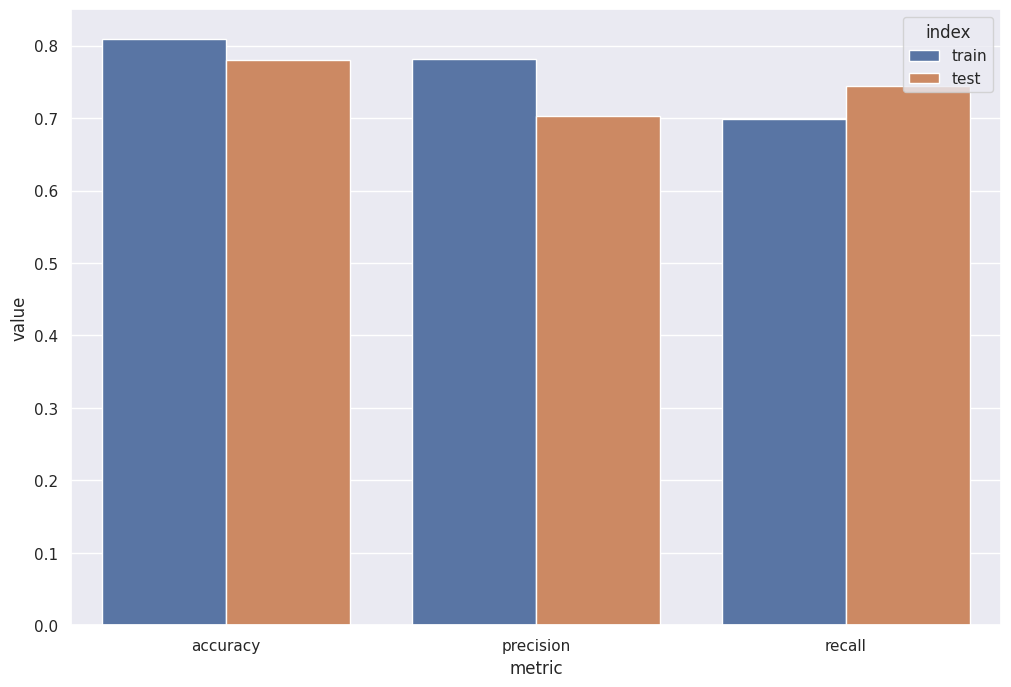

In [153]:
sns.barplot(x='metric', y='value', hue='index', data=melted)
plt.show()

## 6.2 Random forest

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
from sklearn.model_selection import train_test_split


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [158]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [159]:
y_pred_rf = model.predict(X_test)

In [160]:
from sklearn.metrics import accuracy_score

In [161]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [162]:
accuracy_test_rf = accuracy_score(y_test, y_pred_rf)
precision_test_rf = precision_score(y_test, y_pred_rf)
recall_test_rf = recall_score(y_test, y_pred_rf)
f1_score_test_rf = f1_score(y_test, y_pred_rf)

In [163]:
print('Accuracy:', accuracy_test_rf)
print('Precision:', precision_test_rf)
print('Recall:', recall_test_rf)
print('F1 score:', f1_score_test_rf)

Accuracy: 0.8212290502793296
Precision: 0.8387096774193549
Recall: 0.7027027027027027
F1 score: 0.7647058823529411


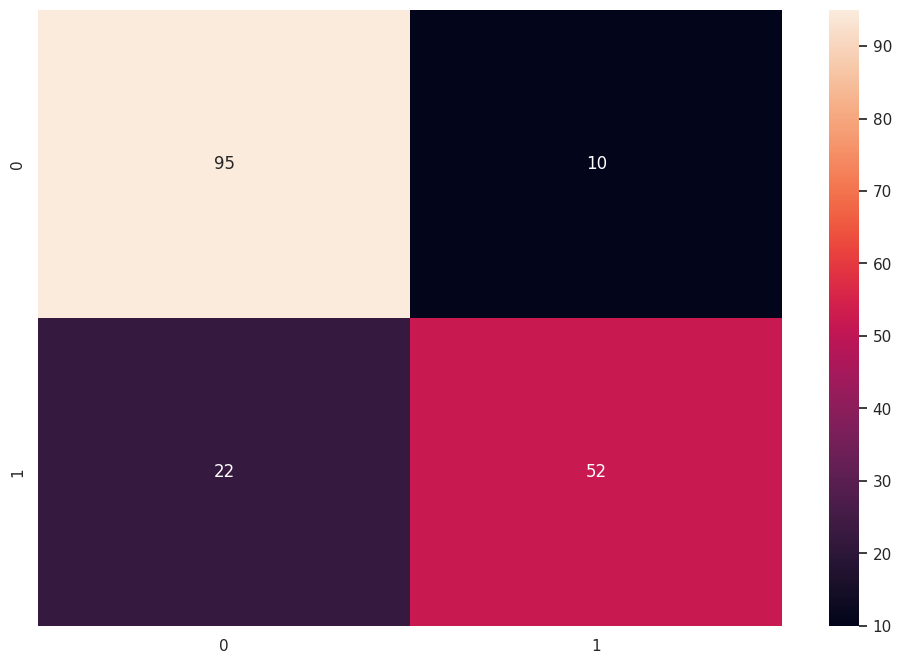

In [164]:
cm_train=confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.show()

## 6.3 XGBoost

In [165]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', seed=42)

In [168]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [169]:
y_pred_xgb = model.predict(X_test)

In [170]:
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       105
           1       0.72      0.68      0.70        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



In [171]:
accuracy_test_xgb = accuracy_score(y_test, y_pred_xgb)
precision_test_xgb = precision_score(y_test, y_pred_xgb)
recall_test_xgb = recall_score(y_test, y_pred_xgb)
f1_score_test_xgb = f1_score(y_test, y_pred_xgb)

In [172]:
print('Accuracy:', accuracy_test_xgb)
print('Precision:', precision_test_xgb)
print('Recall:', recall_test_xgb)
print('F1 score:', f1_score_test_xgb)

Accuracy: 0.7597765363128491
Precision: 0.7246376811594203
Recall: 0.6756756756756757
F1 score: 0.6993006993006994


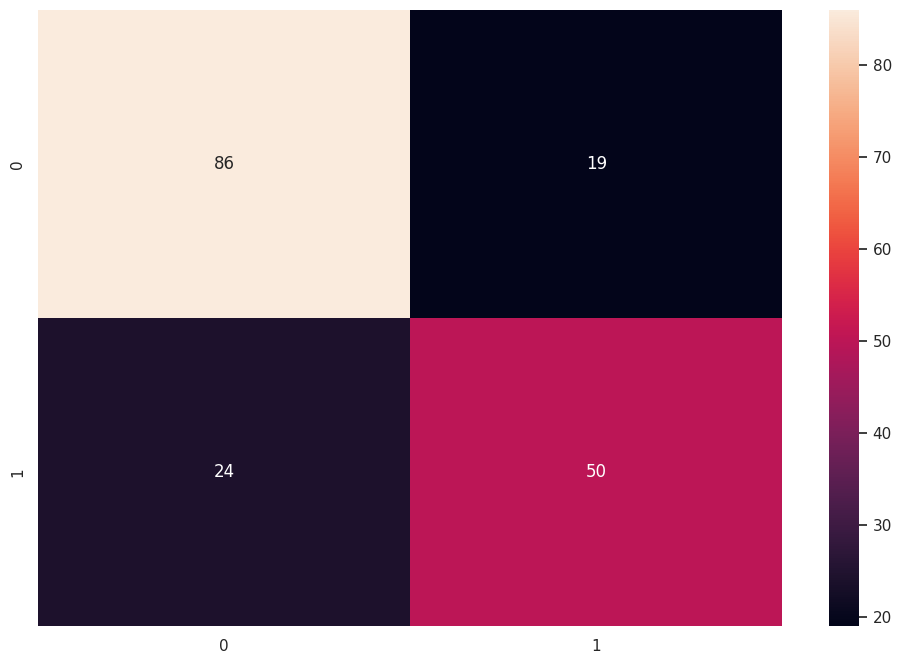

In [173]:
cm_train=confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.show()

# 6.4 Support Vector Machine

In [174]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
model_svm = SVC(kernel='linear', random_state=42)

In [177]:
model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [178]:
y_pred_svm = model_svm.predict(X_test)


In [179]:
from sklearn.metrics import accuracy_score

In [180]:
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [181]:
accuracy_test_svm = accuracy_score(y_test, y_pred_svm)
precision_test_svm = precision_score(y_test, y_pred_svm)
recall_test_svm = recall_score(y_test, y_pred_svm)
f1_score_test_svm = f1_score(y_test, y_pred_svm)

In [182]:
print('Accuracy:', accuracy_test_svm)
print('Precision:', precision_test_svm)
print('Recall:', recall_test_svm)
print('F1 score:', f1_score_test_svm)

Accuracy: 0.7821229050279329
Precision: 0.7536231884057971
Recall: 0.7027027027027027
F1 score: 0.7272727272727273


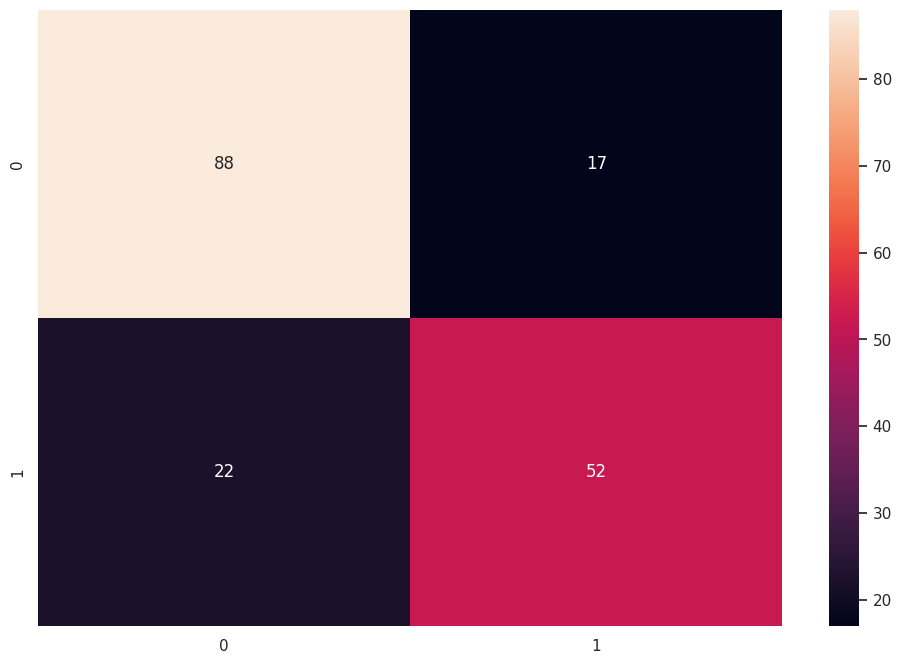

In [183]:
cm_train=confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.show()

# 6.5 KNN

In [184]:
from sklearn.neighbors import KNeighborsClassifier

In [185]:
model_knn = KNeighborsClassifier(n_neighbors=5)

In [186]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [187]:
y_pred_knn = model_knn.predict(X_test)

In [188]:
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.74      0.66       105
           1       0.44      0.28      0.34        74

    accuracy                           0.55       179
   macro avg       0.52      0.51      0.50       179
weighted avg       0.53      0.55      0.53       179



In [189]:
accuracy_test_knn = accuracy_score(y_test, y_pred_knn)
precision_test_knn = precision_score(y_test, y_pred_knn)
recall_test_knn = recall_score(y_test, y_pred_knn)
f1_score_test_knn = f1_score(y_test, y_pred_knn)

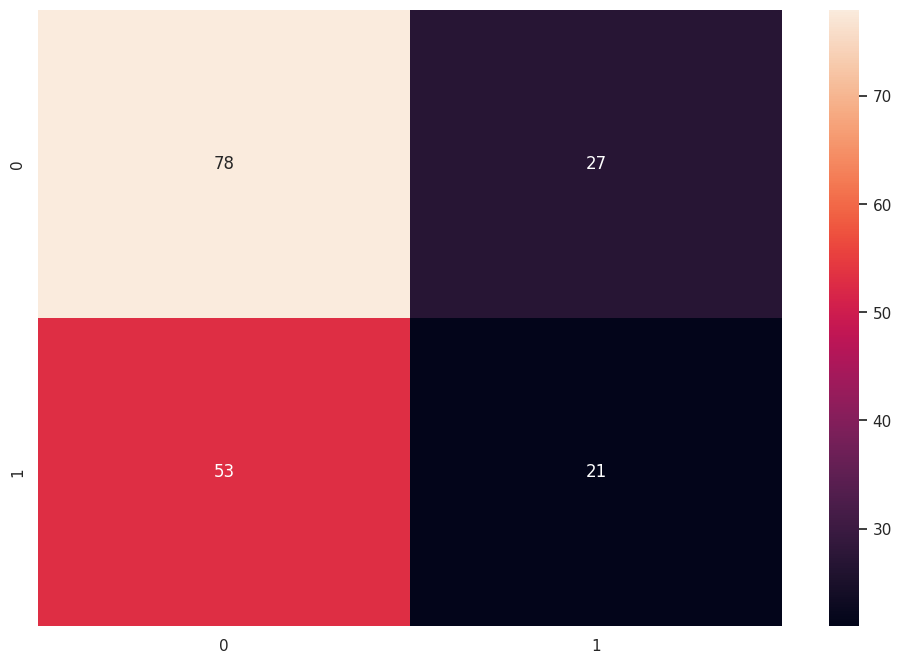

In [190]:
cm_train=confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.show()

## 7. Conclusion

In [191]:
from tabulate import tabulate


In [196]:
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Support Vector Machine', 'K Nearest Neighbours'],
    'Accuracy': [accuracy_test, accuracy_test_rf, accuracy_test_xgb, accuracy_test_svm, accuracy_test_knn],
    'Precision': [precision_test, precision_test_rf, precision_test_xgb, precision_test_svm, precision_test_knn],
    'F1 Score': [f1_score_test, f1_score_test_rf, f1_score_test_xgb, f1_score_test_svm, f1_score_test_knn],
    'Recall': [recall_test, recall_test_rf, recall_test_xgb, recall_test_svm, recall_test_knn]
}

In [197]:
df = pd.DataFrame(data)
df_sorted = df.sort_values(by='F1 Score', ascending=False)

In [198]:
print(df_sorted)

                    Model  Accuracy  Precision  F1 Score    Recall
1           Random Forest  0.821229   0.838710  0.764706  0.702703
3  Support Vector Machine  0.782123   0.753623  0.727273  0.702703
0     Logistic Regression  0.780269   0.703297  0.723164  0.744186
2                 XGBoost  0.759777   0.724638  0.699301  0.675676
4    K Nearest Neighbours  0.553073   0.437500  0.344262  0.283784


This project used 5 classification models on the Titanic data set to find out which model is the most accurate in predicting passenger survival. The table above shows the performance of these models on a sample of the training data.

As seen in the table, the most accurate model was Random Forest. This could be attributed to its complexity compared to other methods.

The least accurate model was K Nearest Neighbours. While K Nearest Neighbours can be used for classification models as well, it doesn't align well with the data structure in this case, as the relationship between independent and dependent variables in this dataset doesn't perfectly reflect the methodology of KNN.

A 50 percent chance of prediction can be considered a benchmark for this project, as it represents a random guess at how likely it is to correctly predict passenger survival in general. In comparison with this benchmark, all of the models succeeded because they all had an accuracy above 50 percent. But as mentioned before, Random Forest was the most accurate for this task.
